# User Selection - Based Querying 

## Set up

### Load Required Libraries 

In [59]:
from QC_functions import * 

In [60]:
#denote wich brain we're using, like S1 (this is the atlas image for the overlay) 
# brain_img_orig=imread('/project/roysam/rwmills/repos/cluster-contrast-reid/examples/data/atlas_borders.tif')
from skimage.color import rgb2gray
downsize_val = 12
brain_img_orig=rgb2gray(imread('/project/ece/roysam/lhuang37/cluster-contrast-reid/examples/data/Swanson_S1_Atlas_Fit_1.tif'))
brain_img_orig= resize(brain_img_orig, (int(29398/downsize_val), int(43054/downsize_val)),anti_aliasing=True)

In [61]:
#Define the library of networks: 
#       Paths for each trained network by name 
cell_type1 = ['cellType_5','all_brain_Cells', 75, 'brain' ] #dn, dn2, data_size, data_type 
# myelo0 = ['all_brain_noRECA_FULL','all_brain_noRECA_IM', 150, 'brain' ] #dn, dn2, data_size, data_type 

no_reca = ['all_brain_noRECA', 'all_brain_noRECA_IM', 150, 'brain'] #neuronal phenotypic markers 
myeloN1 = [  'connectivity0_noRECA_NeuN', 'UNet_CA_myelo' , 150, 'brain'] # connectivity0_S10N
myeloN2 = [  'connectivity0_noRECA_NeuN', 'UNet_SAEA_myelo2' , 150, 'brain'] # 
myeloN3 = [  'connectivity0_noRECA_NeuN', 'UNet_ftTL_myelo2' , 150, 'brain'] # 


phenotype = []
death = [] 

In [62]:
# Or tissue region 
#brain_img_orig=[]

In [63]:
#Define the library of networks: 
#       Paths for each trained network by name 
phenotype = ['MDA_GBM_1001421_round1','MDA_GBM_1001421_round1.1', 150, 'brain' ] #dn, dn2, data_size, data_type 
round1= ['MDA_GBM_1168457_round1.2','MDA_GBM_1168457_round1.2', 100, 'brain' ] #neuronal phenotypic markers 
round2= ['MDA_GBM_1168457_round2.2','MDA_GBM_1168457_round2.2', 100, 'brain' ]
death = [] 

### Define DNNs for feature extraction 

In [64]:
#Define which DNNs are desired for user experiment 
# --------------------------------------------------------***USER INPUT***------------------------------------------------------------------------
# channel_collection = [ round1,round2] #, myeloN] 
channel_collection = [myeloN1, myeloN2, myeloN3]

In [65]:
#Extract Datasets for each and store in either a list or dictionary or something 
dist_array, centroid_Q_array, centroid_G_array, dataset_array ,distance_rerank_array= [],[],[],[],[]
for channel_set in channel_collection: 
    dist_orig, distance_rerank, centroid_Q, centroid_G, dataset= set_up_data(channel_set[0], channel_set[1], channel_set[2], channel_set[3] )
    dist, _, _, _= set_up_dataCosine(channel_set[0], channel_set[1], channel_set[2], channel_set[3] )
    dist_array.append(dist)
    distance_rerank_array.append(distance_rerank)
    cQ = [ [int(i[0]/downsize_val), int(i[1] / downsize_val)] for i in centroid_Q]
    centroid_Q = cQ 
    centroid_Q_array.append(centroid_Q) 
    # centroid_Q_array.append( [ [int(i[0]/4), int(i[1] / 4)] for i in centroid_Q]) 
    # centroid_G_array.append(centroid_G/4) 
    cG = [ [int(i[0]/downsize_val), int(i[1] / downsize_val)] for i in centroid_G]
    centroid_G = cG 
    centroid_G_array.append(centroid_G) 
    # centroid_G_array.append( [ [int(i[0]/4), int(i[1] / 4)] for i in centroid_G] ) 
    dataset_array.append(dataset) 

No reranking accessible
No Cosine distance features avalaible
Searching in directory:  /project/ece/roysam/lhuang37/cluster-contrast-reid/examples/data/connectivity0_noRECA_NeuN
=> Brain loaded
Dataset statistics:
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |    99 |    73815 |         9
  query    |    99 |     7382 |         9
  gallery  |    99 |    81197 |         9
  ----------------------------------------
Searching in directory:  /project/ece/roysam/lhuang37/cluster-contrast-reid/examples/data/connectivity0_noRECA_NeuN
=> Brain loaded
Dataset statistics:
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |    99 |    73815 |         9
  query    |    99 |     7382 |         9
  gallery  |    99 |    81197 |         9
  ----------------------------------------
No reranking accessible
No Cosine distan

# Querying 

### Predefined group of clicks denoted by step size 

In [66]:
#Either Load in x queries, or denote a centroid 
print(os.listdir('/project/ece/roysam/lhuang37/cluster-contrast-reid/examples/data/clicks/'))
clicks = np.load('/project/ece/roysam/lhuang37/cluster-contrast-reid/examples/data/clicks/clicks_Swanson0.npy') 
step_size = 10 # 10
print(len(clicks)/step_size) 
segs = range(0, len(clicks), step_size) 
t=1
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
query_list = clicks[segs[t] : segs[t+1]]  

query_list = [ [int(i[0] / downsize_val ) , int(i[1] / downsize_val)] for i in query_list]  
print('t is: ', t) 

['clicks0.npy', 'clicks1.npy', 'clicks2.npy', 'clicks_Swanson0.npy']
21.0
t is:  1


### Manually selected set of queries 

In [67]:
# Or select a query location 
# --------------------------------------------------------***USER INPUT***------------------------------------------------------------------------
query_list = [[10000, 10000]] # [[9389, 3094] ]

### Select Queries of interested based on classification table 

In [68]:
clicks = pd.read_csv('/project/ece/roysam/lhuang37/rachel_data/brain/50Plex/S1/classification_table_master.csv') 
print('Keys to choose from: ', clicks.keys()) 

Keys to choose from:  Index(['ID', 'centroid_x', 'centroid_y', 'xmin', 'ymin', 'xmax', 'ymax',
       'NeuN', 'S100', 'Olig2', 'Iba1', 'RECA1', 'Cleaved Caspase-3',
       'Tyrosine Hydroxylase', 'Blood Brain Barrier', 'GFP', 'PDGFR beta',
       'Parvalbumin', 'Choline Acetyltransferase', 'GFAP',
       'Smooth Muscle Actin', 'Glutaminase', 'Doublecortin', 'Sox2', 'PCNA',
       'Vimentin', 'GAD67', 'Tbr1', 'Eomes', 'Calretinin', 'Nestin',
       'Aquaporin-4', 'Calbindin'],
      dtype='object')


In [69]:
# Define keys of interest to seed queries from 
interest_criteria = ['ID', 'centroid_x', 'centroid_y', 'NeuN', 'Eomes'] #get pymidal neurons in the brain 

In [70]:
interest_table = clicks[interest_criteria]

neun=interest_table[interest_table['NeuN']==1]

pyr_neun = neun[neun['Eomes']==1]


In [71]:
location = 12

x= pyr_neun.iloc[location]['centroid_x'] 
y = pyr_neun.iloc[location]['centroid_y'] 

print(x, y) 

24106.0 10329.0


In [72]:
query_list= [[int(x), int(y)]] 

print(query_list) 

[[24106, 10329]]


In [73]:
layer1=[[7792, 3163], [7199, 3660], [6536, 4272], [5746, 4769]  ]
layer2=[ [9009, 3258], [8302, 3551], [7479, 4227], [7071, 4508], [6415, 4858], [5892, 5425], [5937, 5763]]
layer3=[]
layer4=[]
layer5=[]
layer6=[]

In [74]:
clicks

ID  centroid_x  centroid_y   xmin   ymin   xmax   ymax  NeuN  \
0            1       38157       29149  38142  29135  38173  29164   0.0   
1            2       10900       28364  10880  28356  10921  28372   0.0   
2            3       10939       28358  10923  28352  10955  28365   0.0   
3            4       10833       28350  10813  28339  10853  28362   0.0   
4            5       10790       28348  10771  28338  10809  28358   0.0   
...        ...         ...         ...    ...    ...    ...    ...   ...   
219629  219630       16488        1045  16476   1038  16501   1053   0.0   
219630  219631       16468        1042  16457   1035  16480   1050   0.0   
219631  219632       16353        1040  16340   1034  16366   1047   0.0   
219632  219633       16386        1039  16371   1031  16401   1047   0.0   
219633  219634       16435        1037  16420   1028  16451   1046   0.0   

        S100  Olig2  ...  Sox2  PCNA  Vimentin  GAD67  Tbr1  Eomes  \
0        0.0    0.0  ...     0     0         0      0     0      0   
1        0.0    1.0  ...     0     0         1      1     1      0   
2        0.0    1.0  ...     0     0         1      1     1      0   
3        0.0    1.0  ...     0     0         1      0     1      0   
4        0.0    1.0  ...     0     0         1      0     1      0   
...      ...    ...  ...   ...   ...       ...    ...   ...    ...   
219629   0.0    0.0  ...     1     0         1      1     1      0   
219630   0.0    0.0  ...     0     0         1      1     1      0   
219631   0.0    0.0  ...     1     0         1      1     1      0   
219632   0.0    0.0  ...     1     0         1      1     1      0   
219633   0.0    0.0  ...     1     1         1      1     1      0   

        Calretinin  Nestin  Aquaporin-4  Calbindin  
0                0       0            0          0  
1                0       1            1          0  
2                0       1            1          0  
3                0       1            1          0  
4                0       1            1          0  
...            ...     ...          ...        ...  
219629           0       1            1          0  
219630           0       1            1          0  
219631           0       1            1          0  
219632           1       1            1          0  
219633           0       1            1          0  

[219634 rows x 33 columns]

In [75]:
#query_list = [ [ int(i[0] / downsize_val), int(i[1] / downsize_val)] for i in clicks]
#After Liqiang Modify
clicks['click_x'] = clicks['centroid_x'].apply(lambda x: int(x/downsize_val))
clicks['click_y'] = clicks['centroid_y'].apply(lambda x: int(x/downsize_val))
query_list = clicks[['click_x', 'click_y']].values.tolist()


## Thresholding 

min distance:  942.4653839796982
max distance:  3425.036788123596
min distance:  942.4653839796982
max distance:  3425.036788123596
min distance:  942.4653839796982
max distance:  3425.036788123596


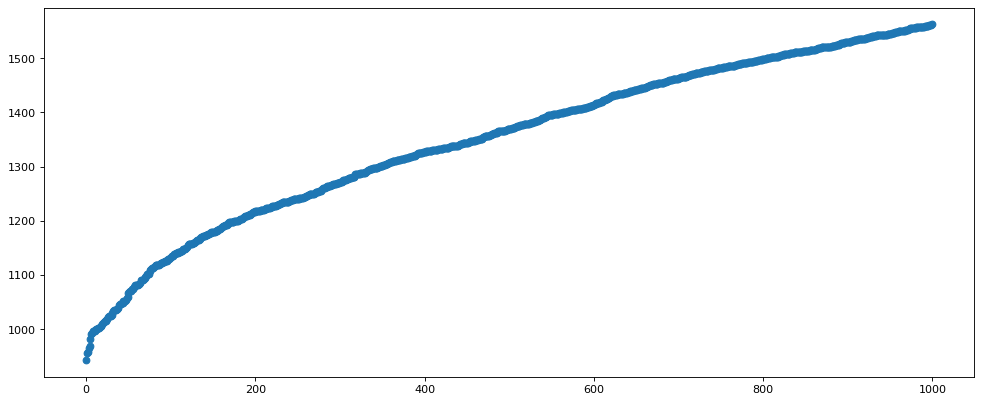

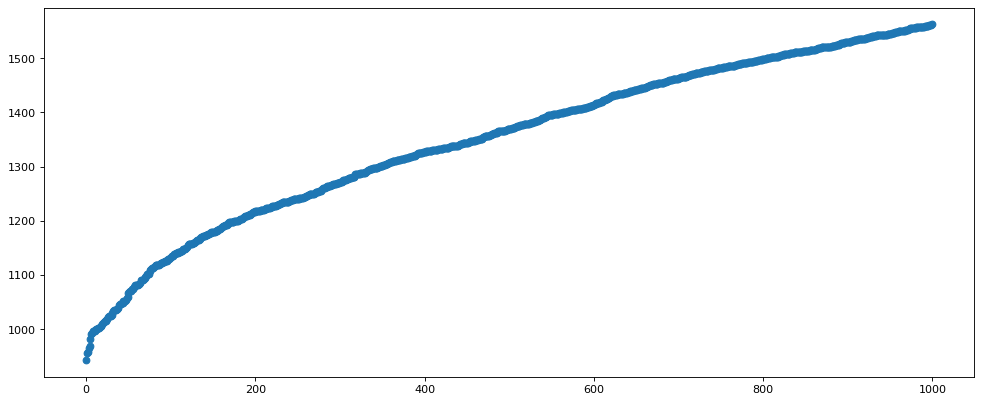

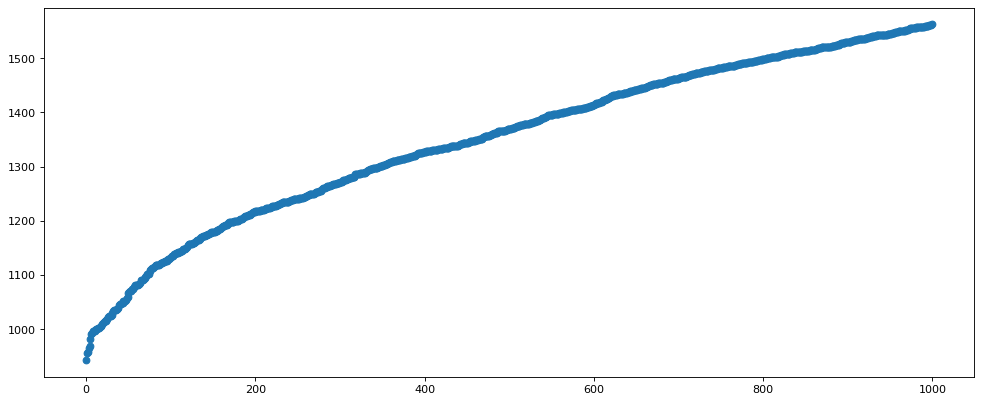

In [76]:
num=1000
distances=[] 
for i in range(len(channel_collection)): 
    plt.figure(figsize=(15, 6), dpi=80)
    sD, sI = find_several_cents_to_pt((query_list[0] ), centroid_Q_array[i])
    distances.append(sD[0:num]) 
    plt.scatter(range(0, len(sD[0:num])), sD[0:num])
    # plt.scatter(sD, range(0, len(sD)))
    print('min distance: ', min(sD)) 
    print('max distance: ', max(sD))
df = pd.DataFrame(np.transpose(distances) )

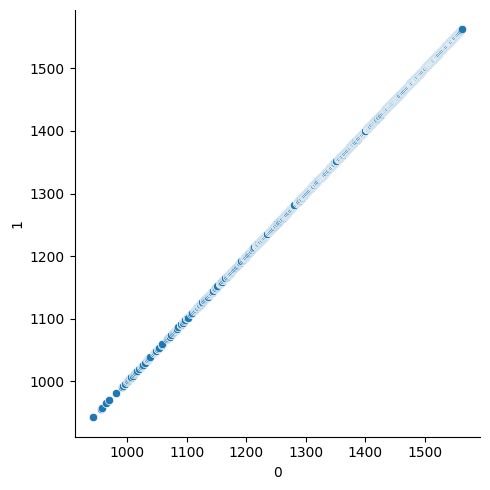

In [77]:
sns.relplot(data=df, x=df[0], y=df[1])

/scratch/108690/ipykernel_318193/2704915645.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  x1,y1 = sns.distplot(df[1], hist=False).get_lines()[0].get_data()
/scratch/108690/ipykernel_318193/2704915645.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  x0,y0 = sns.distplot(df[0], hist=False).get_li

200

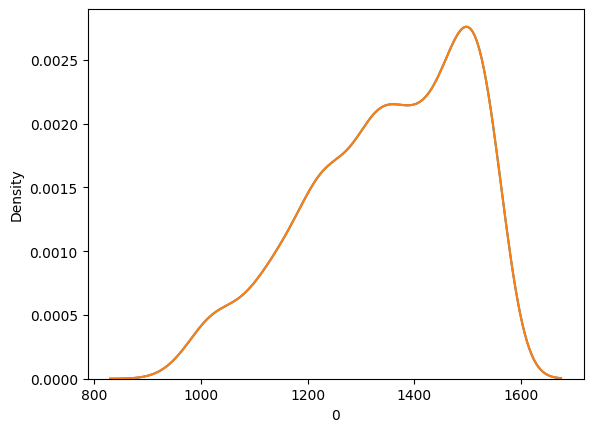

In [78]:
# x,y = sns.kdeplot(df).get_lines()[0].get_data()

x1,y1 = sns.distplot(df[1], hist=False).get_lines()[0].get_data()
x0,y0 = sns.distplot(df[0], hist=False).get_lines()[0].get_data()
len(y1<0)

In [79]:
brain_img_pix=[] 
for i in range(brain_img_orig.shape[0]): 
    for j in range(brain_img_orig.shape[1]): 
        if brain_img_orig[i, j] != 0: 
            brain_img_pix.append((i, j)) 
       

In [80]:
def quickplot_overlay_brainBbx_centHEAT(cent, cent_List, Distances): 
    #distnaces are sorted!!
    #image[bbx[1] - margin:bbx[3] + margin, bbx[0] - margin:bbx[2] + margin, :] 
    cent_list = cent_List.copy()
    cent_list.reverse()
    distances = Distances.copy()
    distances.reverse() 
    
    heatmap, xedges = np.histogram(distances, bins=1000)
    # print(heatmap, xedges) 
    heatmap=heatmap/np.amax(heatmap) 
    extent = [xedges[0], xedges[-1]]

    fig = plt.figure(figsize=(20, 15)) 
    y=[i[0] for i in cent_list] 
    x=[i[1] for i in cent_list] 
    plt.scatter(x, y, c=distances, cmap='viridis_r') #maker ','
    # plt.scatter(x, y, c=norm(distances), cmap='viridis_r') #maker ','
    '''
    for ind, i in enumerate(cent_list ): 
        col_indx = np.where(distances[ind] <= xedges)[0][0] 
        val = heatmap[col_indx-1] 
        # plt.plot(i[1] , i[0], marker='.', color=(val,val,val), markersize=15)
        # plt.scatter(i[1] , i[0], marker='.', c=distances[ind], cmap='viridis')
        plt.scatter(i[1] , i[0], marker='.', c=val, cmap='viridis')
    '''
    # plt.plot(cent[0], cent[1], marker='*', color='red', markersize=15)
    # plt.plot(cent[1] + 10763, cent[0] + 10763, marker='*', color='red', markersize=15)
    plt.plot(cent[1] , cent[0], marker='.', color='red', markersize=15)
    plt.colorbar() 
    y=[i[0] for i in brain_img_pix] 
    x=[i[1] for i in brain_img_pix] 
    plt.scatter(x,y, color = 'black', s=0.01)  
    plt.gca().invert_yaxis()
    # plt.imshow(brain_img_orig) 
    plt.show()

In [81]:
int_cent=[10817.0,28302.0]

In [82]:

# int_cent = [14975, 30381] # [14975, 32381]#[7303, 20581]
print('goal centroid is: ', int_cent) 
sD, sI = find_several_cents_to_pt((int_cent ), centroid_Q)
print(sI[0]) 

goal centroid is:  [10817.0, 28302.0]
4197


In [84]:
int_cent = query_list[21]
# int_cent = [14975, 30381] # [14975, 32381]#[7303, 20581]
print('goal centroid is: ', int_cent) 
sD, sI = find_several_cents_to_pt((int_cent ), centroid_Q)
print(sI[0]) 

goal centroid is:  [901, 2358]
4749


target:  2915
Best cutoff:  47.73205906622166 %


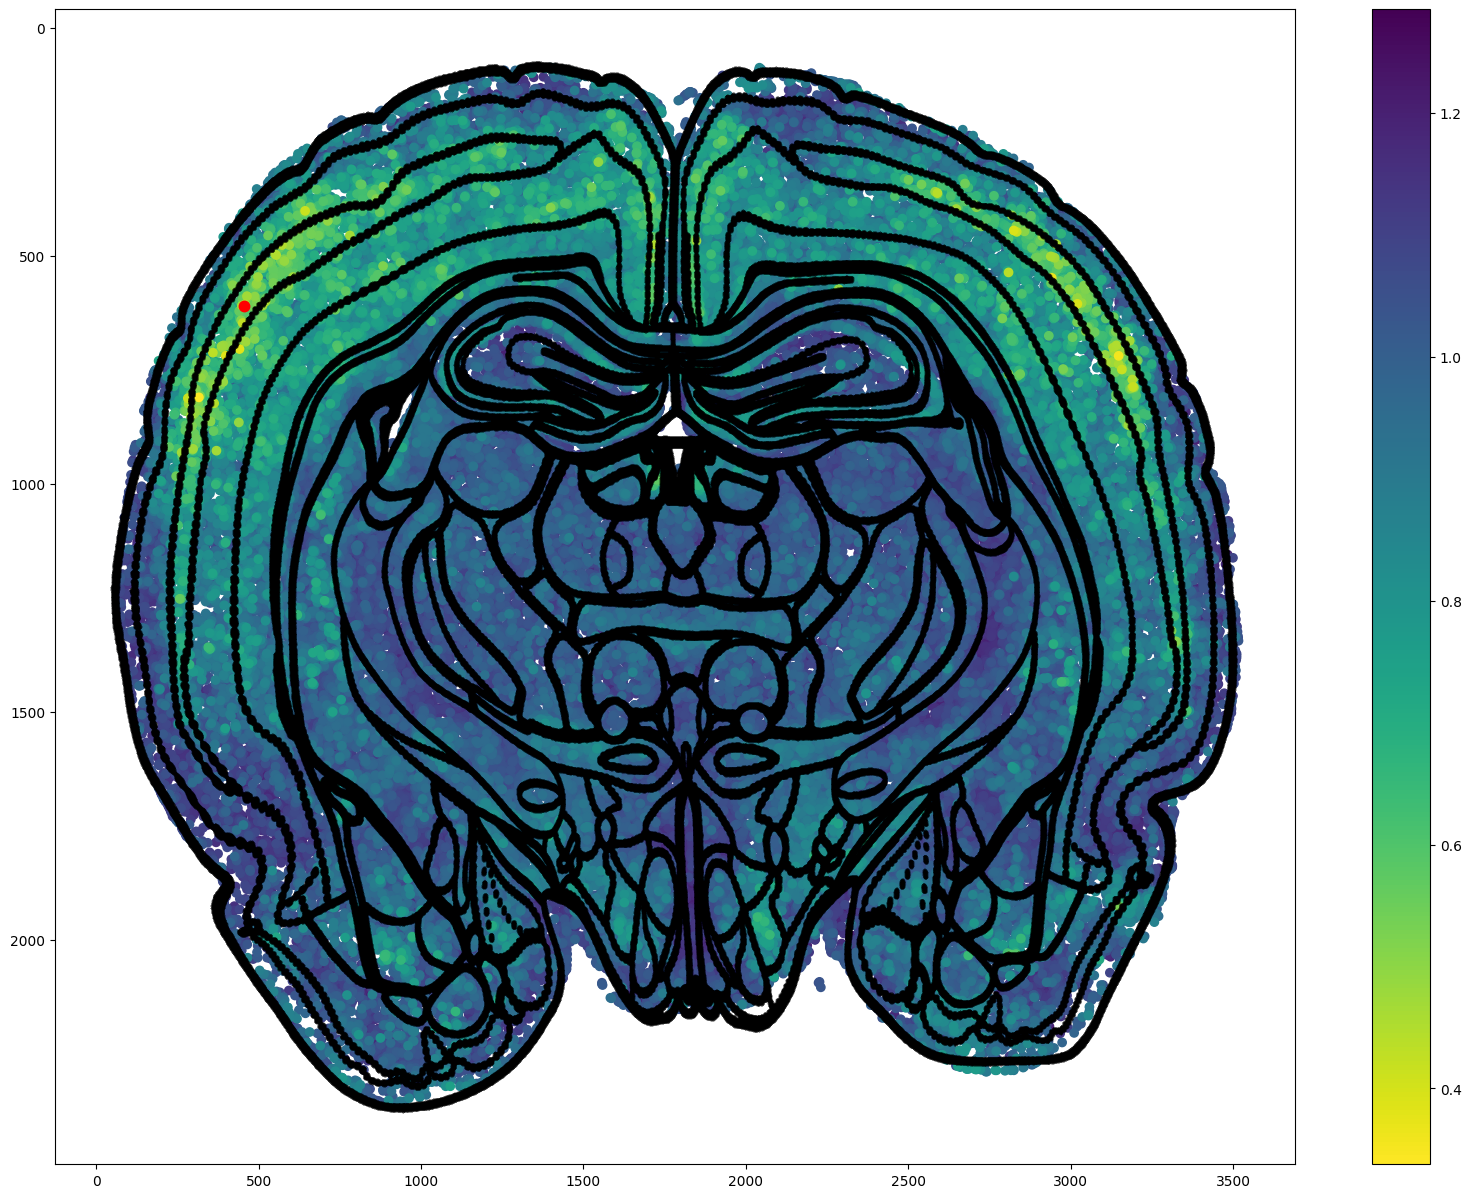

Best cutoff:  54.65842334076382 %


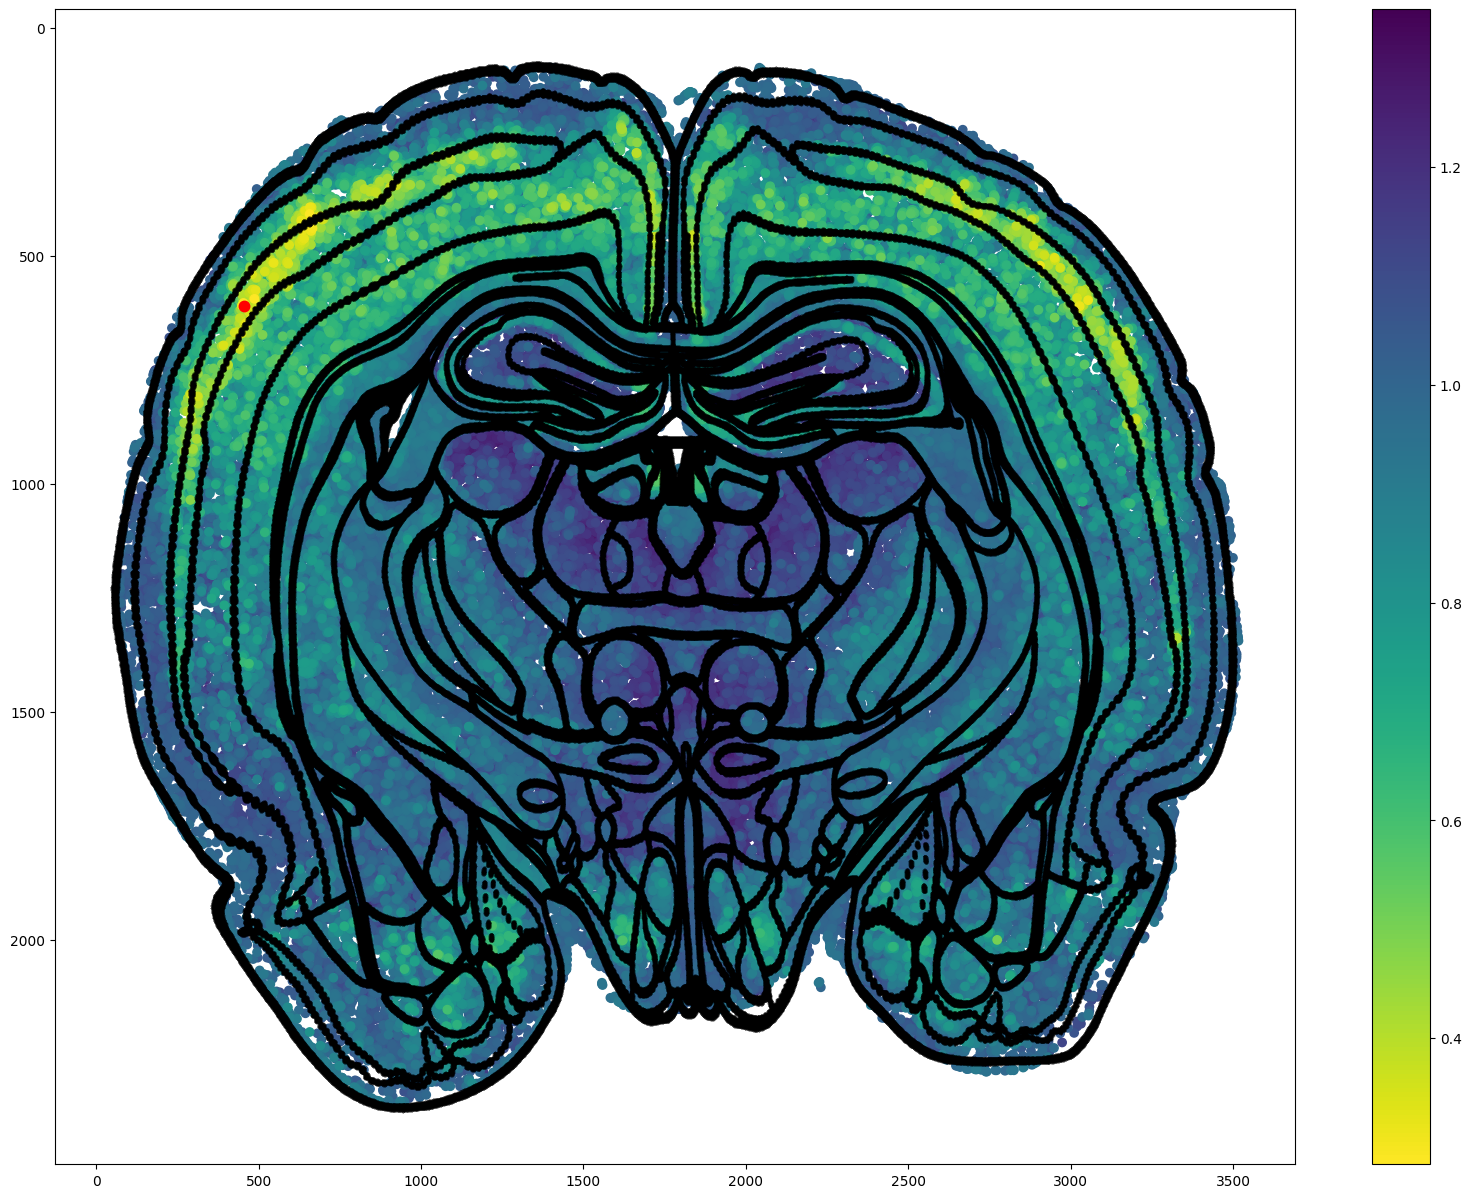

Best cutoff:  48.37124524305085 %


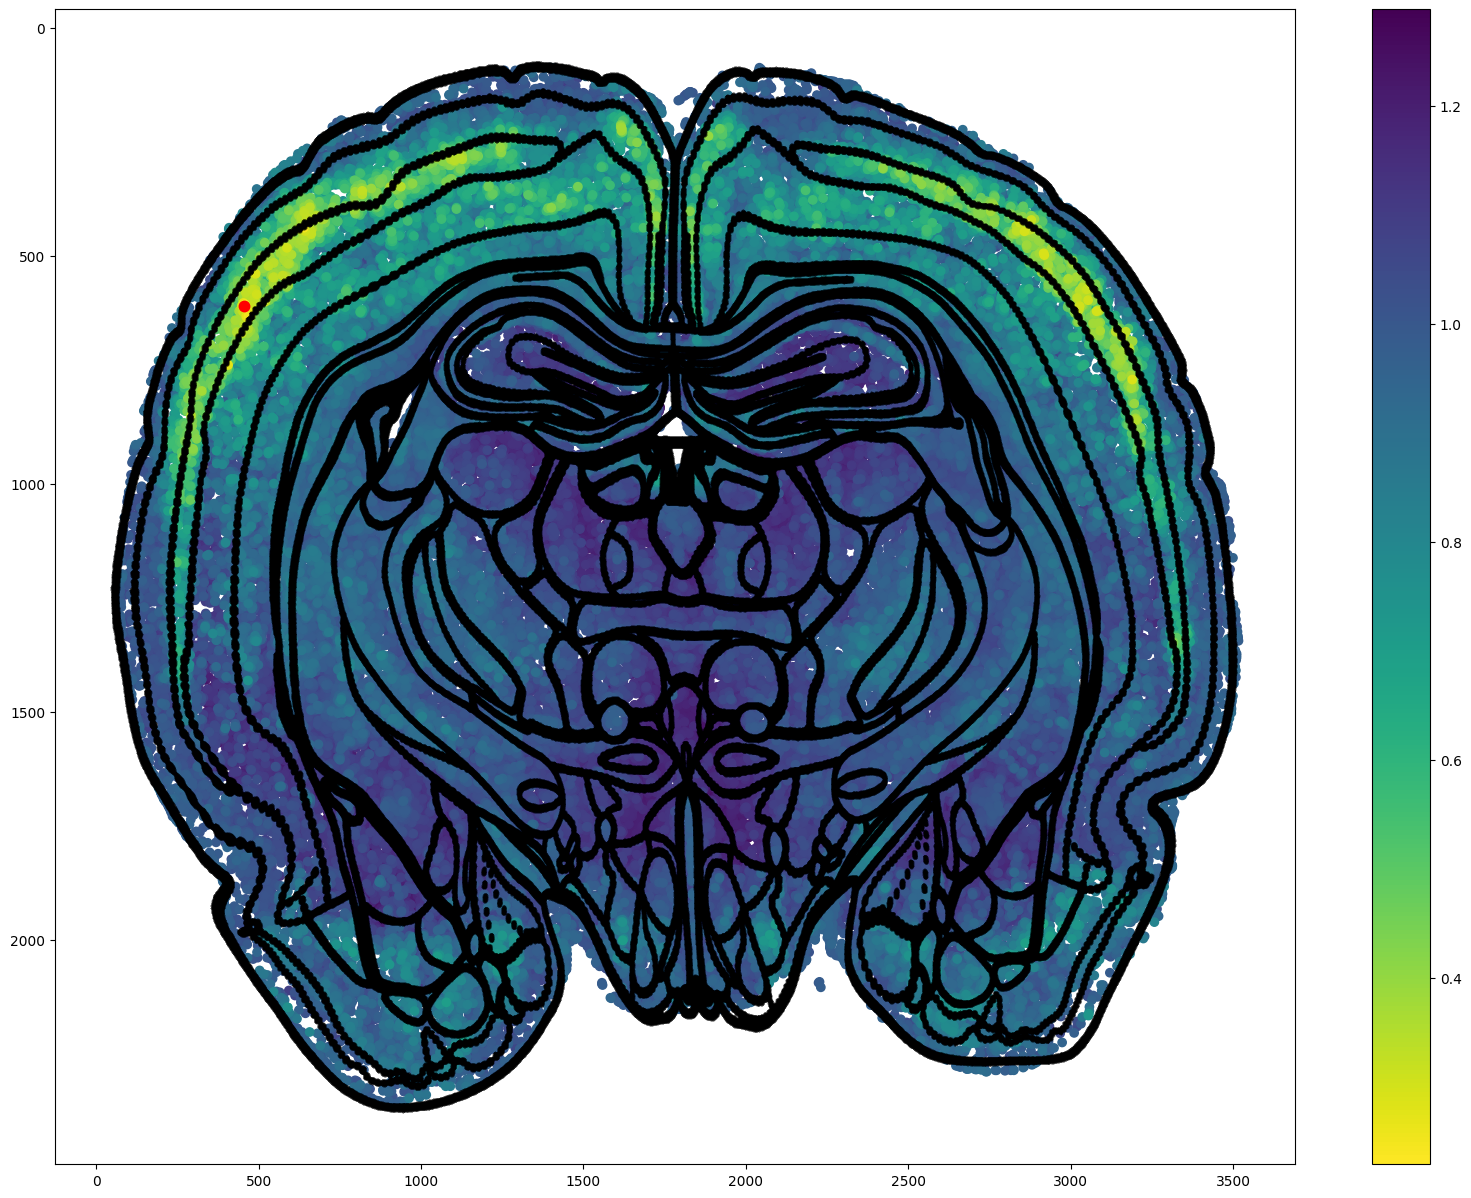

In [85]:
# target_num = 2646 # random.randint(0, len(centroid_Q_array[0]) )# 2432# 15531 #7248 # random.randint(0, len(q) ) # 
target_num = 2915 # sI[0]
print('target: ', target_num)
for i, centroid_G in enumerate(centroid_G_array): 
    select_num =len(centroid_G) # 500# np.sum((s < 1)*1) 
    s = dist_array[i][target_num]
    littles = []
    for i in s: 
        if i< 1: 
            littles.append(i)
    print('Best cutoff: ', len(littles)/len(s)*100 ,'%') 
    sort_index = np.argsort(s)
    top10_cent_indx = [ centroid_G[i] for i in sort_index[0:select_num] ]#top 100
    quickplot_overlay_brainBbx_centHEAT(centroid_Q[target_num], top10_cent_indx, list(np.sort(s)[0:select_num]))

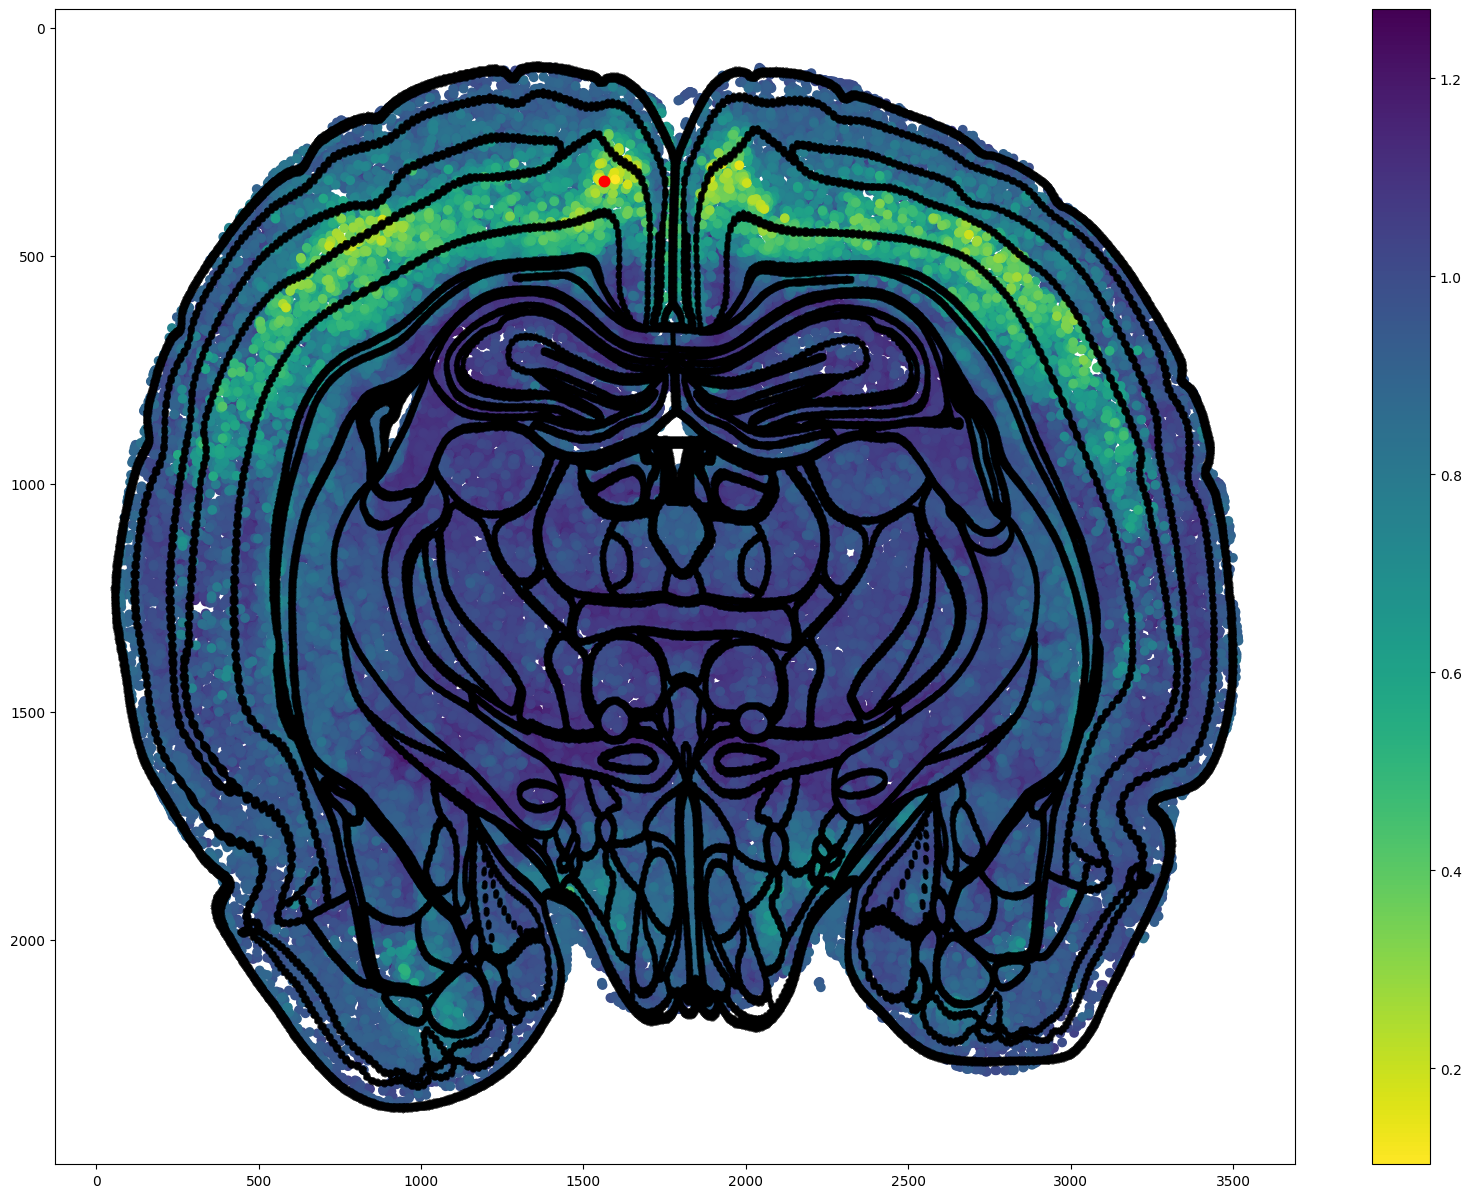

In [86]:
def intuative_distance(full_set, good_set = None, bad_set =None): 
    '''
    the query location is the centroid of the target query point 
    the good set is a set of indicies or something where we want to boost these similarities ( a subset of the full set) 
    bad set could be the opposite where we want to penalize the distances (a subset of the full set) 
    full set has to be the full set of distances at that query point 
    ''' 
    boosted_distances=full_set        
    try: 
        for i in good_set: #each index 
            boosted_distances[i] = full_set[i] - 0.2 #boost 
    except: 
        print('No positive set') 
    try: 
        for i in bad_set: 
            if i in good_set: 
                boosted_distances[i]  = full_set[i] + 0.4 #penalize 
            else: 
                boosted_distances[i]  = full_set[i] + 0.2 #penalize 
    except: 
        print('No contrastive set') 
    return boosted_distances #return the new distances 

# query_pt = [7792//12, 3163//12]
# good_pt = [5746//12, 4769//12]
# bad_pt= [9009//12, 3258//12]

# #get the indicies 
# sD, sI = find_several_cents_to_pt(query_pt, centroid_Q)
# query_ind = sI[0] 
# print('query: ', query_ind) 
# sD, sI = find_several_cents_to_pt(good_pt, centroid_Q)
# good_ind = sI[0] 
# print('good ind: ', good_ind) 
# sD, sI = find_several_cents_to_pt(bad_pt, centroid_Q)
# bad_ind = sI[0] 
# print('bad ind: ', bad_ind) 

query_ind = 3473
good_ind = 2594
bad_ind = 2915

#top similar points 
s = dist_array[2][good_ind]
good_set = np.argsort(s)[0:5000] 
# good_set = [ centroid_G[i] for i in sort_index[0:100] ]#top 100
s = dist_array[2][bad_ind]
bad_set = np.argsort(s)[0:5000] 
# bad_set = [ centroid_G[i] for i in sort_index[0:100] ]#top 100


new_set = intuative_distance(dist_array[2][query_ind] , good_set = good_set, bad_set =bad_set)
sort_index = np.argsort(new_set)

top10_cent_indx = [ centroid_G[i] for i in sort_index[0:select_num] ]#top 100

quickplot_overlay_brainBbx_centHEAT(centroid_Q[query_ind], top10_cent_indx, list(np.sort(new_set)[0:select_num]))

In [87]:
dist_array[2][query_ind][good_set[0]]

0.8383764

plotting:  500


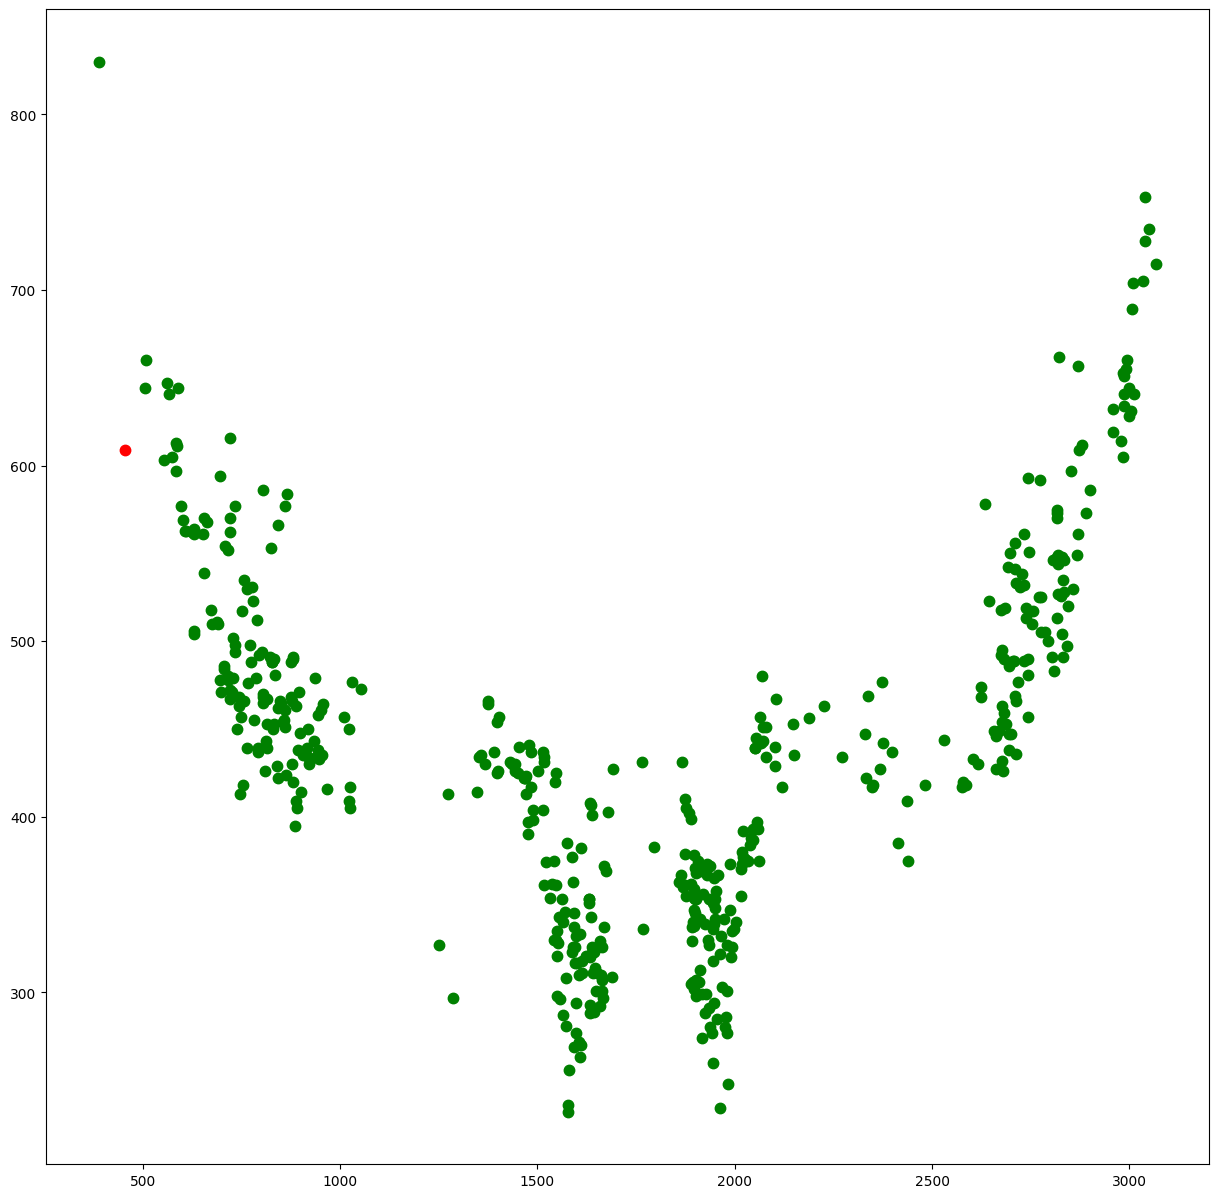

In [88]:
select_num =500 
print('plotting: ', select_num) 
top10_cent_indx = [ centroid_G[i] for i in sort_index[0:select_num] ]#top 100
# top10_cent_indx = [ centroid_G[i] for i in sort_index[0:100] ]#top 100

# quickplot_overlay_brainBbx_centHEAT(centroid_Q[target_num], top10_cent_indx, list(np.sort(s)))
quickplot_overlay_brainBbx_cent(centroid_Q[target_num], top10_cent_indx)
# quickplot_overlay_brainBbx_centHEAT(centroid_Q[target_num], top10_cent_indx, list(np.sort(s)[0:select_num]))

## Retreival Generation 

In [89]:
i=1
tt=2.3
rcU_a = generate_union_multiQuery(query_list, centroid_Q_array[i], centroid_G_array[i], dist_array[i],tt)
quick_overlay_brainBbx_multicent(query_list, rcU_a)
quickplot_overlay_brainBbx_centHEAT(centroid_Q[target_num], top10_cent_indx, list(np.sort(s)[0:select_num]))

: 

In [ ]:
# Generate retrieval set for each and quickplot to see if it makes senSe 
# query_list =[centroid_Q_array[0][target_num]]
# --------------------------------------------------------***USER INPUT***------------------------------------------------------------------------
temp_thresh = [.9, .9] #, 1.3, 1.3] 
rcU=[] 
for i, centroid_Q in enumerate(centroid_Q_array): 
    rcU_a = generate_union_multiQuery(query_list, centroid_Q, centroid_G_array[i], dist_array[i],temp_thresh[i])
    print(len(rcU_a) ) 
    rcU+=(rcU_a)  
quick_overlay_brainBbx_multicent(query_list, rcU)

In [ ]:
temp_thresh = [1.3, 1.3, 1.5]#, 1.5, 1.5] 
# --------------------------------------------------------***USER INPUT***------------------------------------------------------------------------

rcI=[] 
rcU_prior = generate_union_multiQuery(query_list, centroid_Q, centroid_G_array[0], dist_array[0],temp_thresh[0])

for i in range(1, len(channel_collection)): 
    rcU_a = generate_union_multiQuery(query_list, centroid_Q, centroid_G_array[i], dist_array[i],temp_thresh[i])
    intersectionAB = list(set(rcU_prior).intersection(set(rcU_a)))
    rcI+=(intersectionAB)  
    rcU_prior = rcU_a
quick_overlay_brainBbx_multicent(query_list, rcI)

In [ ]:
rcI1 = rcI

In [ ]:
differenceAB = list(set(rcI1).difference(set(rcI2)))

quick_overlay_brainBbx_multicent(layer1, differenceAB)

In [ ]:
differenceAB = list(set(rcI2).difference(set(rcI1)))

quick_overlay_brainBbx_multicent(layer2, differenceAB)

## Plots 

In [ ]:
# Plot the query location for each set: 
pic_array = [] 
for int_cent1 in query_list: 
    for i, centroid_Q in enumerate(centroid_Q_array): 
        sD1a, sI1a = find_several_cents_to_pt((int_cent1 ), centroid_Q)
        indx =sI1a[0]
        pic = imread(dataset_array[i].gallery[indx][0])
        # if pic.shape[2] == 10: 
            # pic = np.dstack((pic[:,:,0:8], pic[:,:,9:10]  ))
        # else: 
        pic_array.append(pic) 
        # plot7ch_cmap(pic, pic.shape[2], cmap_list)
        plot7ch(pic, pic.shape[2], [])

In [ ]:
 # print(data.shape)
mins=[] 
maxes=[] 
for data in pic_array: 
    for i in range(pic.shape[2]):  
        mins.append(np.amin(data[:,:,i]))
        maxes.append(np.amax(data[:,:,i]))
minn = np.amin(np.array(mins))        
maxx= np.amax(np.array(maxes)) - 2000
print('min and max: ', minn, maxx) 

In [ ]:
# Plot the top n retrievals by each channel for each set 
ch = 0
# --------------------------------------------------------***USER INPUT***------------------------------------------------------------------------

dif = 12 - len(query_list) 
newq = np.concatenate((query_list, rcU[0:dif] ), axis=0)

pic_array = np.zeros((pic.shape[0], pic.shape[1], len(newq))) 
# print(pic_array.shape) 
for i, int_cent1 in enumerate(newq): 
    sD1a, sI1a = find_several_cents_to_pt((int_cent1 ), centroid_Q)
    indx =sI1a[0]
    pic = imread(dataset.gallery[indx][0])
    # if pic.shape[2]== 10: 
        # pic = np.dstack((pic[:,:,0:8], pic[:,:,9:10]  ))
    # print(pic[:,:,ch].shape) 
    pic_array[:,:,i] = (pic[:,:,ch]) 
plot7ch_single(pic_array, pic_array.shape[2], minn, maxx  )

### Plot the Brain Overlay

In [ ]:
# Plot the overlay of the entire set over the brain 
plot_overlay_brainBbx_multicent(query_list, rcU, brain_img_orig) #too much memory??? 